In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
sns.set(style='darkgrid')


from scipy import stats
import math

In [2]:
os.chdir('C:\\Users\\user\\Documents\\2020년 2학기\\Raw')
set_code = 'S71'
set_name = 'Galaxy'

Base_data = pd.read_csv('Phone_data.csv')
Base_data = Base_data[Base_data['브랜드']==set_name]
Base_data = Base_data[Base_data['피험자']!='P03']
Base_data = Base_data[Base_data['피험자']!='P30']
print(Base_data.columns)
Base_data.tail()

Index(['피험자', '성별', '나이', '핸드폰_선호', '핸드폰_사용', '감정통제력', '충동통제력', '공감능력',
       '갤럭시_평가', '아이폰_평가', '브랜드', '개성_흥미', '개성_유능함', '개성_강인함', '태도', '애착',
       '충성도', '신경증', '외향성', '개방성', '성실성', '친화성'],
      dtype='object')


,피험자,성별,나이,핸드폰_선호,핸드폰_사용,감정통제력,충동통제력,공감능력,갤럭시_평가,아이폰_평가,...,개성_유능함,개성_강인함,태도,애착,충성도,신경증,외향성,개방성,성실성,친화성
49,P25,F,25.0,Galaxy,Galaxy,2.333333,3.000000,3.666667,3.0,3.0,...,3.666667,4.75,4.000000,4.75,4.2,4.000000,4.000000,4.333333,3.666667,4.000000
51,P26,F,25.0,LG,LG,3.333333,3.333333,3.000000,2.0,1.0,...,6.000000,5.50,2.666667,1.50,1.0,3.000000,3.333333,2.000000,3.000000,2.000000
53,P27,M,23.0,iphone,iphone,4.000000,4.000000,4.333333,7.0,5.0,...,5.666667,4.00,2.333333,1.50,1.0,3.666667,4.000000,1.666667,3.000000,3.666667
55,P28,M,24.0,iphone,iphone,2.666667,4.000000,3.333333,6.0,5.0,...,6.000000,6.50,4.333333,3.00,3.0,3.666667,4.000000,2.333333,3.333333,4.000000
57,P29,F,20.0,Galaxy,Galaxy,2.666667,3.666667,3.666667,1.0,1.0,...,4.666667,4.50,4.000000,4.25,4.0,2.666667,2.666667,3.666667,3.333333,3.333333


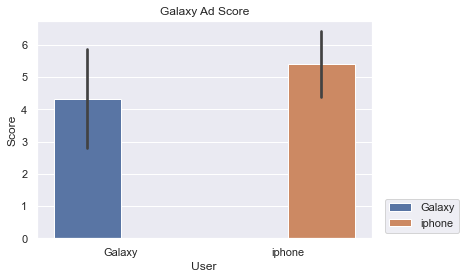

In [3]:
label = '핸드폰_사용'
ax = sns.barplot(data = Base_data[Base_data['핸드폰_사용'] != 'LG'], x=label, y='갤럭시_평가', hue=label,ci='sd')
ax.set(xlabel=None)
plt.title('Galaxy Ad Score')
plt.ylabel('Score')
plt.xlabel('User')
plt.legend(loc='lower center', bbox_to_anchor=(1.15,0))
plt.show()

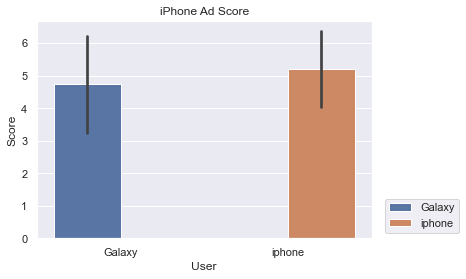

In [4]:
label = '핸드폰_사용'
ax = sns.barplot(data = Base_data[Base_data['핸드폰_사용'] != 'LG'], x=label, y='아이폰_평가', hue=label,ci='sd')
ax.set(xlabel=None)
plt.title('iPhone Ad Score')
plt.ylabel('Score')
plt.xlabel('User')
plt.legend(loc='lower center', bbox_to_anchor=(1.15,0))
plt.show()

## FAA 데이터 처리

In [5]:
os.chdir('.\\2s Export\\log_data')
d_list = os.listdir()

In [6]:
data_set_list = []
data_p_list = []
for d in d_list:
    if d.split('_')[0] == set_code:
        data_set_list.append(d)
        data_p_list.append('P'+ str(d.split('_')[1].split('.')[0][2:]) )

print('데이터 개수 :',len(data_set_list))
print('피험자 수 :',len(data_p_list))
print(data_set_list)
print(data_p_list)

데이터 개수 : 29
피험자 수 : 29
['S71_0001.csv', 'S71_0002.csv', 'S71_0004.csv', 'S71_0005.csv', 'S71_0006.csv', 'S71_0007.csv', 'S71_0008.csv', 'S71_0009.csv', 'S71_0010.csv', 'S71_0011.csv', 'S71_0012.csv', 'S71_0013.csv', 'S71_0014.csv', 'S71_0015.csv', 'S71_0016.csv', 'S71_0017.csv', 'S71_0018.csv', 'S71_0019.csv', 'S71_0020.csv', 'S71_0021.csv', 'S71_0022.csv', 'S71_0023.csv', 'S71_0024.csv', 'S71_0025.csv', 'S71_0026.csv', 'S71_0027.csv', 'S71_0028.csv', 'S71_0029.csv', 'S71_0030.csv']
['P01', 'P02', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30']


In [7]:
df1 = pd.DataFrame()
for i in range(len(data_set_list)):
    raw = data_set_list[i]
    df = pd.read_csv(raw)
    col_nm = df.columns
    
    if i == 0:
        df1['time'] = df['time']
    
    df1[data_p_list[i]] = df['F4/F3']

col = df1.columns.to_list()
col.sort()
print(col)

['P01', 'P02', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'time']


In [8]:
df = pd.DataFrame()
for i in range(len(data_set_list)):
    raw = data_set_list[i]
    P = data_p_list[i]
    raw_df = pd.read_csv(raw)
    raw_df = raw_df[['time','F4/F3']]
    raw_df['P'] = P
    
    df = pd.concat([df, raw_df])

df.rename(columns={'F4/F3':'FAA'}, inplace=True)
df

,time,FAA,P
0,-12,-0.073439,P01
1,-10,0.100864,P01
2,-8,0.421352,P01
3,-6,0.203973,P01
4,-4,-0.114497,P01
...,...,...,...
17,22,-0.205561,P30
18,24,-0.264717,P30
19,26,-0.017279,P30
20,28,-0.536570,P30


## FAA 그래프 그리는 함수 정의

In [9]:
# 그래프 그리기 위한 함수

def draw_offline(Base_data, group_list, y, title):
    Base_T_df = Base_data.copy()
    Base_T_df[label] = Base_T_df['피험자'].apply(lambda x : group_list[0] if x in p_list0 else (group_list[1] if x in p_list1 else 0))
    Base_T_df = Base_T_df[Base_T_df[label] != 0]

    ax = sns.barplot(data = Base_T_df, x=label, y=y, hue=label,ci='sd')
    plt.title(title)
    plt.ylabel('Score')
    plt.xlabel('User')
    plt.legend(loc='lower center', bbox_to_anchor=(1.15,0))
    plt.show()
    
    print(stats.ttest_ind(Base_T_df[Base_T_df[label]==group_list[0]][y], Base_T_df[Base_T_df[label]==group_list[1]][y]))


# 두 그룹 직접 비교용 FAA 선 그래프
def draw_line(data, label, valid_time, ylim=0.55, ad_sec=30, title=None):
    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.lineplot(data=data, x='time', y='FAA', 
                      hue=label, style=label, linewidth=3, ci=None)
    plt.ylabel('FAA')
    plt.xlabel('time(s)')
    plt.ylim(-ylim, ylim)
    plt.xlim(-5, ad_sec)
    
    if title:
        plt.title(title,fontsize=15)
    
    
    # valid 구간 강조
    for time in valid_time:
        plt.axvspan(time-2, time, facecolor='r', alpha=0.2)
    
    plt.show()

# 가독성 저하로 인해 상하분리한 FAA 리본 그래프
def draw_ribbon(data, label, group_list, valid_time, ylim=0.55, ad_sec=30, title=None):
    sns.set(rc={'figure.figsize':(8,8)})
    fig, (ax0,ax1) = plt.subplots(nrows=2)
    
    data_0 = data[data[label]==group_list[0]]
    data_1 = data[data[label]==group_list[1]]
    
    sns.lineplot(data=data_0, x='time', y='FAA', ax=ax0, linewidth=3) 
    sns.lineplot(data=data_1, x='time', y='FAA', ax=ax1, color = '#da6d01', linewidth=3)
    
    if title:
        ax0.set_title(title,fontsize=15)
    
     # valid 구간 강조
    for time in valid_time:
        ax0.axvspan(time-2, time, facecolor='r', alpha=0.2)
        ax1.axvspan(time-2, time, facecolor='r', alpha=0.2) 
    
    ax0.set(ylabel='FAA', xlabel='', ylim=(-ylim,ylim), xlim=(-5,ad_sec))
    ax1.set(ylabel='FAA', xlabel='times(s)', ylim=(-ylim,ylim), xlim=(-5,ad_sec))
    

## 시간구간 별 T-test print 함수

In [30]:
#구간 별 t-test 결과
def time_ttest(main_df=df1, group_list=group_list, p_list0=p_list0, p_list1=p_list1):
    print(f'{group_list[0]}(N={len(p_list0)}) vs {group_list[1]}(N={len(p_list1)})','\n')

    valid = []

    for i in range(len(df1)):
        tTestResult = stats.ttest_ind(df1[p_list0].iloc[i], df1[p_list1].iloc[i], equal_var=False)
        if tTestResult[1] < 0.05:
            print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult, '\t', '*')
            valid.append(df1['time'].iloc[i])
        else:
            print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult)

    print('\n','valid timeline :', valid)
    
    return valid

In [86]:
def time_ttest(main_df=df1, group_list=group_list, p_list0=p_list0, p_list1=p_list1):
    print(f'{group_list[0]}(N={len(p_list0)}) vs {group_list[1]}(N={len(p_list1)})','\n')

    valid = []

    for i in range(len(df1)):
        tTestResult = stats.ttest_ind(df1[p_list0].iloc[i], df1[p_list1].iloc[i], equal_var=False)
        valid.append([df1['time'].iloc[i], tTestResult[0], tTestResult[1]])
        
    valid_df = pd.DataFrame(valid, columns=['time','t','p'])
    valid_df['valid'] = valid_df['p'].apply(lambda x: '*' if x < 0.05 else '')
    
    valid_time = valid_df[valid_df['valid']=='*']['time']
    
    print(valid_df)
    
    return valid_time.to_list()

## 사용 핸드폰 그룹 T-test

In [79]:
variable = '핸드폰_사용'
group_list = Base_data[variable].drop_duplicates().to_list()
print(group_list)

for i in range(len(group_list)):
    globals()['p_list{}'.format(i)] = Base_data[Base_data[variable]==group_list[i]]['피험자'].drop_duplicates().to_list()
    print('p_list{}'.format(i), globals()['p_list{}'.format(i)] )

['Galaxy', 'iphone', 'LG']
p_list0 ['P01', 'P02', 'P04', 'P05', 'P09', 'P11', 'P12', 'P15', 'P16', 'P17', 'P19', 'P21', 'P24', 'P25', 'P29']
p_list1 ['P06', 'P08', 'P10', 'P13', 'P14', 'P18', 'P22', 'P23', 'P27', 'P28']
p_list2 ['P07', 'P20', 'P26']


In [80]:
# 그룹 최종 결정
label = "Users"
group_list = ['Galaxy', 'iPhone']
p_list0 = p_list0
p_list1 = p_list1

Galaxy(N=15) vs iPhone(N=10) 



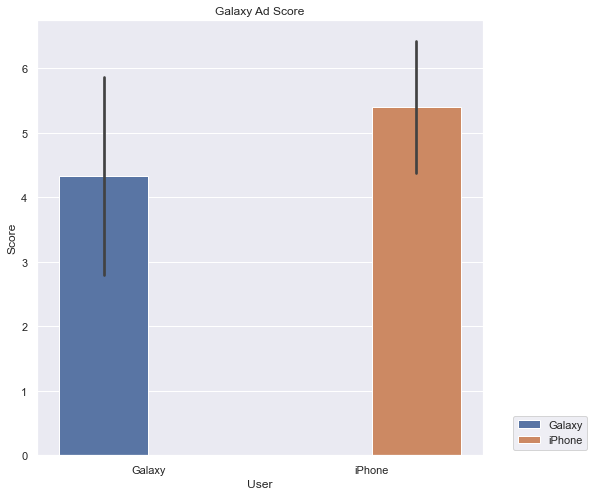

Ttest_indResult(statistic=-1.8528993905777784, pvalue=0.07677156300262869)


In [81]:
# 오프라인 사후 설문결과 비교
print(f'{group_list[0]}(N={len(p_list0)}) vs {group_list[1]}(N={len(p_list1)})','\n')
draw_offline(Base_data, group_list, y='갤럭시_평가', title='Galaxy Ad Score')

In [82]:
# label 칼럼 생성
T_df = df.copy()
T_df[label]= None
print(len(T_df))
T_df.head()

638


,time,FAA,P,Users
0,-12,-0.073439,P01,None
1,-10,0.100864,P01,None
2,-8,0.421352,P01,None
3,-6,0.203973,P01,None
4,-4,-0.114497,P01,None


In [83]:
# T_df에서 label 칼럼에 알맞은 그룹 라벨링
T_df[label] = T_df['P'].apply(lambda x : group_list[0] if x in p_list0 else (group_list[1] if x in p_list1 else 0))
T_df = T_df[T_df[label] != 0]
print(len(T_df))
T_df.head()

550


,time,FAA,P,Users
0,-12,-0.073439,P01,Galaxy
1,-10,0.100864,P01,Galaxy
2,-8,0.421352,P01,Galaxy
3,-6,0.203973,P01,Galaxy
4,-4,-0.114497,P01,Galaxy


In [92]:
#구간 별 t-test 결과
valid = time_ttest(df1, group_list, p_list0, p_list1)

Galaxy(N=15) vs iPhone(N=10) 

    time         t         p valid
0    -12 -0.119199  0.906229      
1    -10  1.483164  0.154290      
2     -8  0.789316  0.442556      
3     -6  0.674539  0.507224      
4     -4 -1.559102  0.144500      
5     -2 -0.522099  0.609481      
6      0 -0.386618  0.703995      
7      2  0.461404  0.650110      
8      4  0.418589  0.679644      
9      6  0.617938  0.543353      
10     8 -0.541310  0.595238      
11    10  1.695599  0.115822      
12    12  1.784864  0.089253      
13    14  0.130957  0.896959      
14    16  2.747721  0.011468     *
15    18  0.290491  0.774045      
16    20  0.819457  0.422281      
17    22  0.719426  0.483842      
18    24 -0.356450  0.725075      
19    26  2.065066  0.051409      
20    28  0.910310  0.373998      
21    30  0.992553  0.331783      


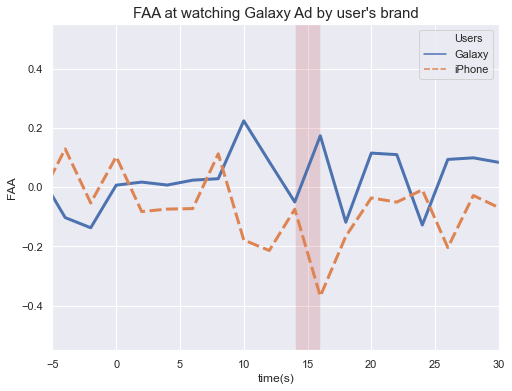

In [93]:
draw_line(T_df, label, valid_time=valid, title="FAA at watching Galaxy Ad by user's brand")

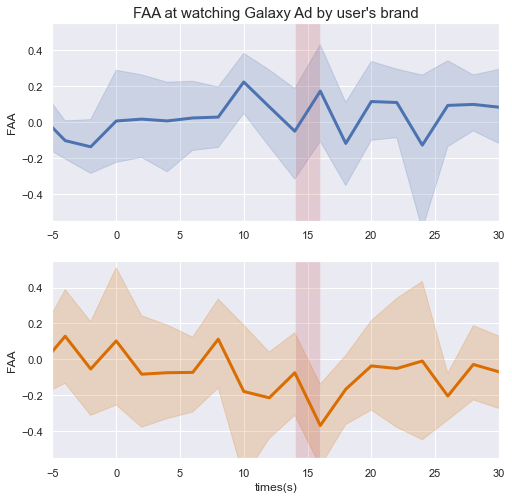

In [94]:
draw_ribbon(T_df, label, group_list, valid_time = valid, title="FAA at watching Galaxy Ad by user's brand")

## 충성도 상위 25%

In [95]:
set_name

'Galaxy'

In [124]:
variable = '충성도'

up_part = Base_data.sort_values(by=[variable], ascending=False).iloc[:int(len(Base_data)*0.34)]
up_part = up_part[up_part['핸드폰_사용'] == set_name]

down_part = Base_data.sort_values(by=[variable], ascending=False).iloc[-int(len(Base_data)*0.3):]
down_part = down_part[down_part['핸드폰_사용'] != set_name]

print(up_part['피험자'].to_list())
print(down_part['피험자'].to_list())

['P09', 'P11', 'P24', 'P16', 'P21', 'P05', 'P15']
['P22', 'P13', 'P28', 'P18', 'P08', 'P26', 'P27']


In [131]:
# 그룹 최종 결정
label = "loyalty"
group_list = ['high','low']
p_list0 = up_part['피험자'].to_list()
p_list1 = down_part['피험자'].to_list()

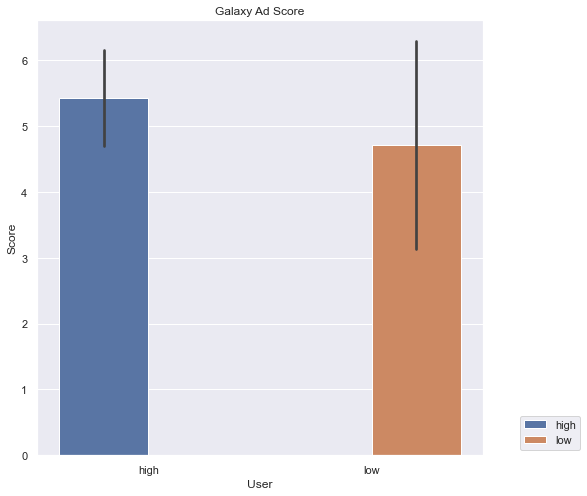

Ttest_indResult(statistic=1.0067340828210365, pvalue=0.3339318686908712)


In [132]:
# 오프라인 사후 설문결과 비교
off_T_df = draw_offline(Base_data, group_list, y='갤럭시_평가', title='Galaxy Ad Score')

In [133]:
# label 칼럼 생성
T_df = df.copy()
T_df[label]= None
print(len(T_df))
T_df.head()

# T_df에서 label 칼럼에 알맞은 그룹 라벨링
T_df[label] = T_df['P'].apply(lambda x : group_list[0] if x in p_list0 else (group_list[1] if x in p_list1 else 0))
T_df = T_df[T_df[label] != 0]
print(len(T_df))
T_df.head()

638
308


,time,FAA,P,loyalty
0,-12,0.008276,P05,high
1,-10,0.611883,P05,high
2,-8,0.349022,P05,high
3,-6,-0.052095,P05,high
4,-4,-0.192379,P05,high


In [134]:
#구간 별 t-test 결과
valid = time_ttest(df1, group_list, p_list0, p_list1)

high(N=7) vs low(N=7) 

    time         t         p valid
0    -12 -0.156169  0.878524      
1    -10  0.546015  0.595062      
2     -8  1.424348  0.184164      
3     -6  1.114784  0.286803      
4     -4 -2.861493  0.016355     *
5     -2 -1.840245  0.094707      
6      0  0.537544  0.601675      
7      2  0.213041  0.834956      
8      4 -0.298816  0.773280      
9      6 -0.074263  0.942047      
10     8 -0.102227  0.920265      
11    10  1.922497  0.081214      
12    12  1.893458  0.082722      
13    14  1.056979  0.312019      
14    16  2.645157  0.026384     *
15    18  0.896418  0.390452      
16    20  1.046843  0.318499      
17    22  0.670233  0.517261      
18    24  0.205016  0.841064      
19    26  2.815694  0.017802     *
20    28  3.075707  0.009713     *
21    30  1.127620  0.289252      


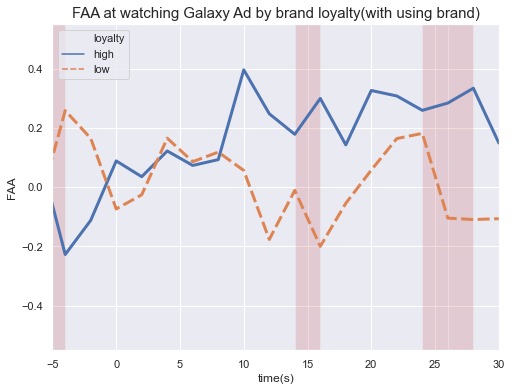

In [135]:
draw_line(T_df, label, valid_time=valid, title="FAA at watching Galaxy Ad by brand loyalty(with using brand)")

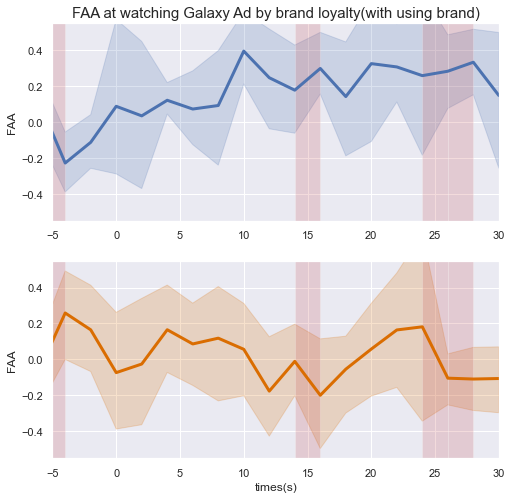

In [136]:
draw_ribbon(T_df, label, group_list, valid_time = valid, title="FAA at watching Galaxy Ad by brand loyalty(with using brand)")

## 광고시청 후 광고평가설문 high/low 그룹

In [137]:
set_name

'Galaxy'

In [164]:
variable = '갤럭시_평가'

up_part = Base_data.sort_values(by=[variable], ascending=False).iloc[:int(len(Base_data)*0.25)]
# up_part = up_part[up_part['핸드폰_사용'] == set_name]

down_part = Base_data.sort_values(by=[variable], ascending=False).iloc[-int(len(Base_data)*0.25):]
# down_part = down_part[down_part['핸드폰_사용'] != set_name]

print(up_part['피험자'].to_list())
print(down_part['피험자'].to_list())

['P11', 'P27', 'P14', 'P28', 'P23', 'P02', 'P09']
['P18', 'P25', 'P07', 'P04', 'P12', 'P26', 'P29']


In [165]:
# 그룹 최종 결정
label = "survey"
group_list = ['high','low']
p_list0 = up_part['피험자'].to_list()
p_list1 = down_part['피험자'].to_list()

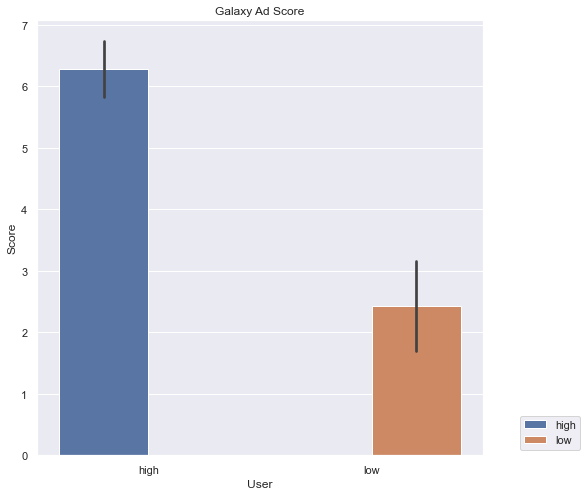

Ttest_indResult(statistic=11.022703842524301, pvalue=1.2386407288339162e-07)


In [166]:
# 오프라인 사후 설문결과 비교
off_T_df = draw_offline(Base_data, group_list, y='갤럭시_평가', title='Galaxy Ad Score')

In [167]:
# label 칼럼 생성
T_df = df.copy()
T_df[label]= None
print(len(T_df))
T_df.head()

# T_df에서 label 칼럼에 알맞은 그룹 라벨링
T_df[label] = T_df['P'].apply(lambda x : group_list[0] if x in p_list0 else (group_list[1] if x in p_list1 else 0))
T_df = T_df[T_df[label] != 0]
print(len(T_df))
T_df.head()

638
308


,time,FAA,P,survey
0,-12,0.050124,P02,high
1,-10,-0.062059,P02,high
2,-8,0.062957,P02,high
3,-6,0.395454,P02,high
4,-4,-0.093857,P02,high


In [168]:
#구간 별 t-test 결과
valid = time_ttest(df1, group_list, p_list0, p_list1)

high(N=7) vs low(N=7) 

    time         t         p valid
0    -12  1.350448  0.201856      
1    -10 -0.497190  0.628722      
2     -8  0.443893  0.666772      
3     -6  0.730621  0.479346      
4     -4 -3.229402  0.010966     *
5     -2 -1.099986  0.293008      
6      0  1.047621  0.319184      
7      2 -0.525367  0.610802      
8      4 -0.917541  0.377454      
9      6 -1.494999  0.160935      
10     8  1.898674  0.082046      
11    10 -0.822501  0.432792      
12    12  0.120229  0.906297      
13    14 -0.237619  0.816611      
14    16 -0.603689  0.558377      
15    18 -0.505171  0.624645      
16    20  0.719776  0.489750      
17    22 -0.891494  0.395130      
18    24 -0.639031  0.535037      
19    26 -1.289757  0.228191      
20    28 -0.427413  0.677600      
21    30  0.259626  0.799831      


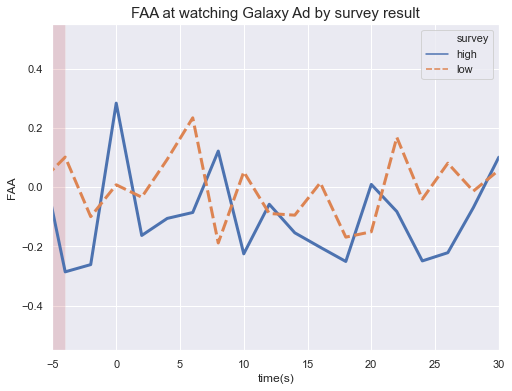

In [169]:
draw_line(T_df, label, valid_time=valid, title="FAA at watching Galaxy Ad by survey result")

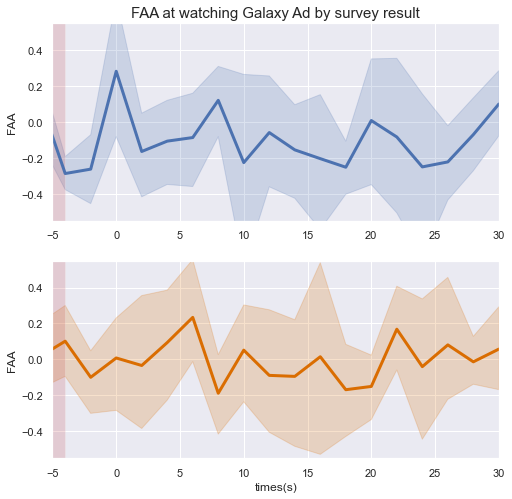

In [170]:
draw_ribbon(T_df, label, group_list, valid_time = valid, title="FAA at watching Galaxy Ad by survey result")

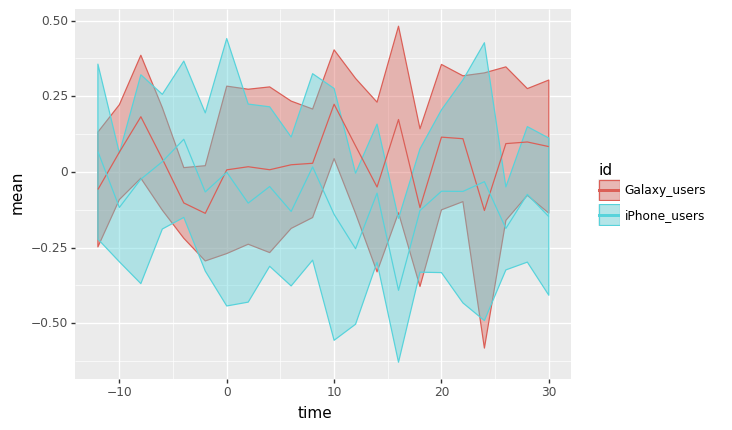

<ggplot: (142493286958)>

In [27]:
# ci 계산 함수 (ggplot으로 그릴 때 사용)
# def col_mean_ci(dataframe, p_col):
#     df = pd.DataFrame()
#     df['time'] = dataframe['time']
#     df['mean'] = dataframe[p_col].mean(axis=1)
#     df['std'] = dataframe[p_col].std(axis=1)
#     n = len(p_col)
#     df['ci95_hi'] = df['mean'] + 1.96*df['std']/math.sqrt(n-1)
#     df['ci95_lo'] = df['mean'] - 1.96*df['std']/math.sqrt(n-1)
#     return df


# ggplot으로 그릴 때 사용
# merge_df = pd.DataFrame()
# for i in range(len(group_list)):
#     globals()['p_list{}_df'.format(i)] = col_mean_ci(df1, globals()['p_list{}'.format(i)])
#     globals()['p_list{}_df'.format(i)][label] = group_list[i]
#     merge_df = merge_df.append(globals()['p_list{}_df'.format(i)])


# fig = plt.Figure()
# (
# ggplot(merge_df, aes(x = 'time', y = 'mean', color = 'id', fill = 'id'))
# +geom_ribbon(aes(ymin='ci95_lo',ymax='ci95_hi', color = 'id'), alpha=0.4)
# +geom_line(aes(x='time',y='mean'))
# )